# **Overview:**
In this section, we will start by performing different Classification models to create a baseline. Then we will proceed by performing Hyperparameter Tuning and employing Ensemble methods and try creating a higher accuracy model.

### **Importing:**
Firstly, importing all necessary libraries is performed for us us to be able to plot graphs, process dataframes, build classification models and metrics for their evaluation.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading and storing the training dataset:
train = pd.read_csv("CS98XClassificationTrain.csv")
train

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,NaN
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,449,But Not For Me,Ella Fitzgerald,1959,80,22,18,-17,10,16,214,92,4,45,adult standards
449,450,Surf City,Jan & Dean,2010,148,81,53,-13,23,96,147,50,3,50,brill building pop
450,451,Dilemma,Nelly,2002,168,55,73,-8,20,61,289,23,14,77,dance pop
451,452,It's Gonna Be Me,*NSYNC,2000,165,87,64,-5,6,88,191,5,8,62,boy band


# **Data Preprocessing:**
### **Data Exploration**
Before jumping staight to model-building, we first perform some data preprocessing to gain a deeper understanding of the data format, potential missing values and duplicates and other relations between data such as multicolinearity. This step will give our data integrity and will make our ML models have more accuracy and reliability. In this part, we will keep only the numerical columns as independent variables excluding the "Id" column, to keep our initial models simple (Columns "title" and "artist" will be removed).

In [3]:
train = train.drop(['Id','title','artist'],axis=1)

Id is useless because is different for every row and serves solely as a row identificator. Furthermore, the columns title and
artist will not yet get examined as we only want to implement some simple classification models which will serve as a baseline.

### **Checking for null values**

In [4]:
train.isna().sum().sort_values(ascending=False)

top genre    15
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

There are 15 null values on the dataset, which will be removed to offer more clean and credible data.

In [5]:
train=train.dropna()

In [6]:
# We will also reset the index to know exactly how many rows the dataset is consisted of:
train = train.reset_index()
train = train.drop(["index"], axis = 1)

### **Inspecting Data Format**

In [7]:
# Identification of the data format of each column might be useful. Failure to properly format data can lead to inaccuracies,
# inefficiencies, and model performance degradation due to inconsistent or incompatible data structures.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       438 non-null    int64 
 1   bpm        438 non-null    int64 
 2   nrgy       438 non-null    int64 
 3   dnce       438 non-null    int64 
 4   dB         438 non-null    int64 
 5   live       438 non-null    int64 
 6   val        438 non-null    int64 
 7   dur        438 non-null    int64 
 8   acous      438 non-null    int64 
 9   spch       438 non-null    int64 
 10  pop        438 non-null    int64 
 11  top genre  438 non-null    object
dtypes: int64(11), object(1)
memory usage: 41.2+ KB


The data format of each numerical column is "int64" type, with the exception of the "top genre" column which is consisted
of categorical variables. Having data types like int64 can be beneficial for ensuring numerical precision and accommodating large integer values.

### **Inspecting Data distribution of each variable**

In [8]:
# Now, we will use the describe() function to gain a deeper understanding of each numerical column of the dataset (Helpful in
# gaining insight regarding the distribution of each variable):
train.describe()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,1990.881279,118.326484,60.504566,59.780822,-8.787671,17.605023,59.625571,228.267123,32.191781,5.671233,61.557078
std,16.697047,25.175735,22.089660,15.404757,3.591005,13.807492,24.480160,63.426812,29.279912,5.571392,12.759353
min,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,1976.000000,100.000000,44.000000,50.000000,-11.000000,9.000000,42.250000,184.500000,7.000000,3.000000,54.000000
50%,1993.000000,120.000000,64.000000,62.000000,-8.000000,13.000000,61.000000,224.000000,23.000000,4.000000,64.000000
75%,2006.000000,133.000000,78.000000,70.750000,-6.000000,23.000000,80.000000,264.000000,57.000000,6.000000,72.000000
max,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,99.000000,47.000000,84.000000


After describing the data, it is obvious that some variables such as dB, live, dur, acous and spch do not follow a normal
distribution and are skewed and may create bias if applied to a model. As a result we will scale the necessary columns to 
avoid such potential issues. To gain a better understanding about the skewed variables we will use visuals. The following subplots will provide a better idea of each column's distribution:

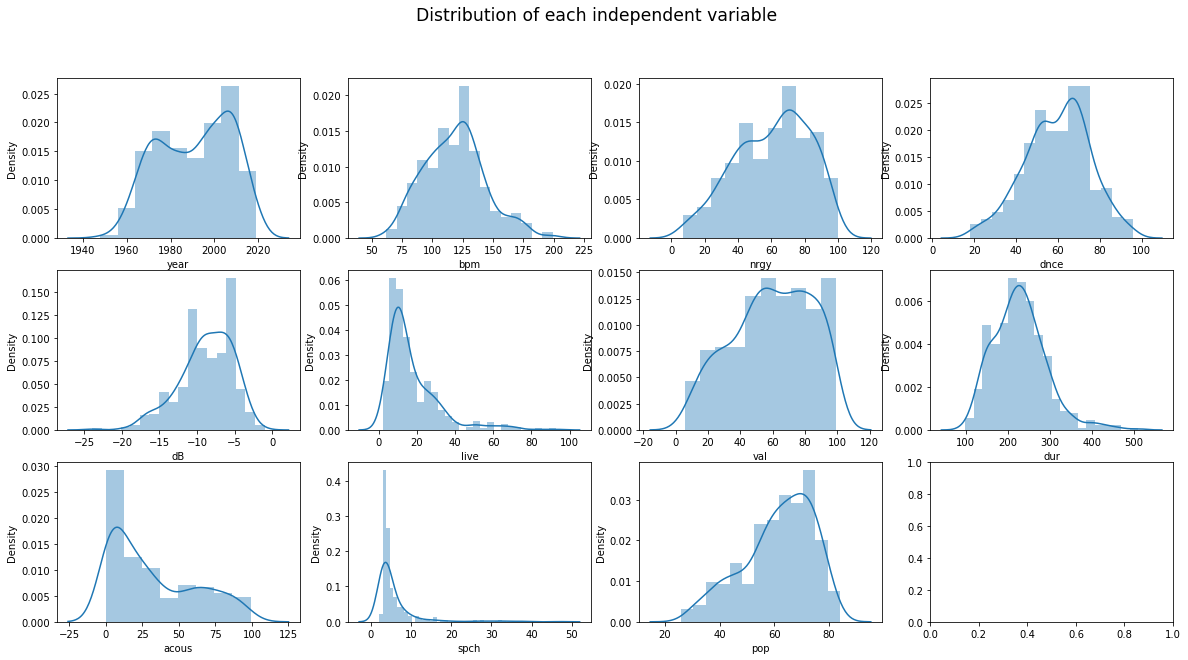

In [9]:
fig,ax = plt.subplots(3,4,figsize=(20,10))

sns.distplot(train['year'],ax=ax[0,0])
sns.distplot(train['bpm'],ax=ax[0,1])
sns.distplot(train['nrgy'],ax=ax[0,2])
sns.distplot(train['dnce'],ax=ax[0,3])
#sns.distplot(df['duration_min'],ax=ax[1,1])
sns.distplot(train['dB'],ax=ax[1,0])
sns.distplot(train['live'],ax=ax[1,1])
sns.distplot(train['val'],ax=ax[1,2])
sns.distplot(train['dur'],ax=ax[1,3])
sns.distplot(train['acous'],ax=ax[2,0])
sns.distplot(train['spch'],ax=ax[2,1])
sns.distplot(train['pop'],ax=ax[2,2])

plt.suptitle("Distribution of each independent variable",fontsize = "xx-large")
plt.show()

With these graphs it is easier to identify skewed variables such as dB, live, dur, acous and spch which do not follow a normal distribution.

### **Inspecting total unique classes**
As mentioned in the beginning, this is a multiclass classification problem which will be able to classify songs to their respective genre. As such, it is important to know the number of our different classes/genres, especially if we were to built a Neurl Network because it determines the structure of the output layer in the neural network, the choice of loss function, and the evaluation metrics used to assess the model's performance (NOT COVERED IN THIS ANALYSIS)

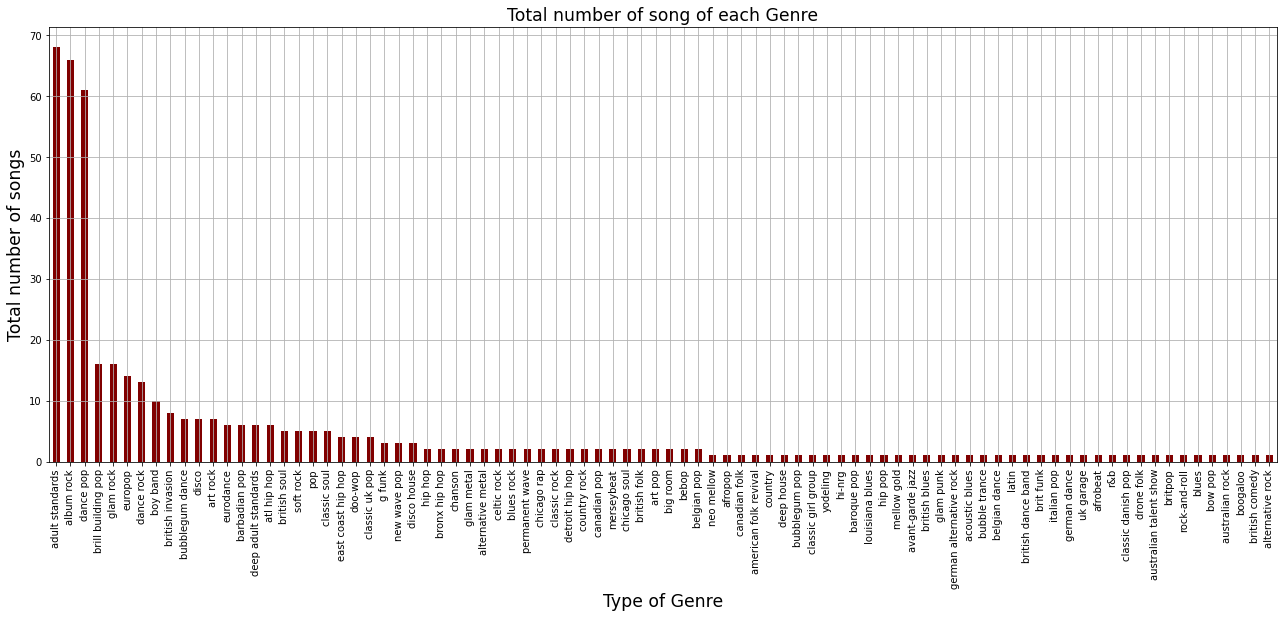

In [11]:
# So, the next bar - graph reveals how many different genres exist within the dataset:
train["top genre"].value_counts().plot.bar(color = "maroon",grid = True, figsize = (22,8))
plt.xlabel("Type of Genre",fontsize = "xx-large")
plt.ylabel("Total number of songs",fontsize = "xx-large")
# Inserting plot title
plt.title("Total number of song of each Genre",fontsize = "xx-large")
plt.show()

In [12]:
train["top genre"].value_counts()

adult standards       68
album rock            66
dance pop             61
brill building pop    16
glam rock             16
                      ..
bow pop                1
australian rock        1
boogaloo               1
british comedy         1
alternative rock       1
Name: top genre, Length: 86, dtype: int64

We see that there are 86 different genres which are too many to build an accurate classification model. An additional issue is
that not every genre is consisted with the same number of songs. For example there are several genres which are consisted of only one or two songs. As a result, this class imblance will present difficulties for any model to train data and classify them to these genres.

### **Multicollinearity inspection**
Another useful thing is to check the variables for potential multicollinearity between them. If multicollinearity exists between two variables, it is better to remove one of them. Otherwise the performance of the classification model will drop.
Another way to deal with multicollinearity is to use PCA (Principal Component Analysis) which takes advantage of multicollinearity and combines the highly correlated variables into a set of uncorrelated variables.

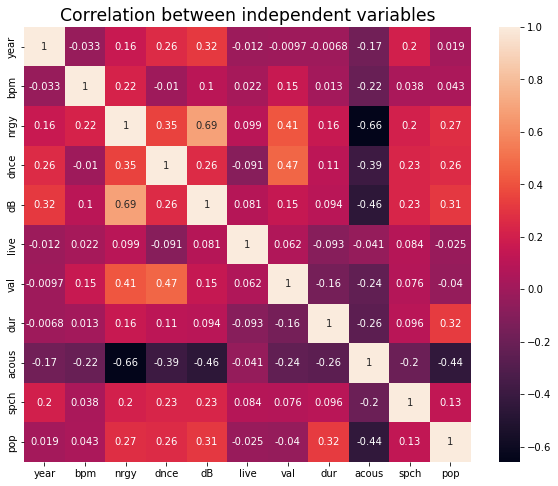

In [13]:
plt.figure(figsize=(10,8)) 
sns.heatmap(train.corr(), annot=True)
plt.title("Correlation between independent variables", fontsize = "xx-large")
plt.show()

From the heatmap, it is clear that there are no signs of multicollinearity beween the variables. The variables "nrgy" and "dB" are slightly correlated, but we will not remove any of them in this part of analysis.

### **Final Preprocessing Touches**
After inspecting thoroughly our data, we can decide which steps should we take to enhance them further and make them more optimal to "feed" our ML model. Null values were dropped, data format is int64, variable distribution was checked, and multicollinearity between variables was inspected.

The only "concerning" issue with our data, at this point at least, seems to be the few skewed variables we have. As such, our final preprocessing step will be to scale the most skewed variables of our dataset ("acous", "spch", "live").

In [14]:
scaler = StandardScaler()
train[["acous", "spch", "live"]] = scaler.fit_transform(train[["acous", "spch", "live"]])

### **Model Building**
After preprocessing, we proceed into model building. Model building is a simple and staightforward process, as seen below. Data is split between value and label sets respectively and further being split into training and testing sets to check accuracy on unknown data.

In [15]:
Y = train.loc[:, 'top genre']
X = train.drop(['top genre'], axis=1)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=15)

After train/test spliting, we will try several classifiers to compare accuracy. These classifiers are in their simplest form and will give ua a general idea of what works better than the rest, providing us useful direction for future analysis.

In [17]:
tree_clf = DecisionTreeClassifier()
log_clf = LogisticRegression()
ovr_clf = OneVsRestClassifier(log_clf)
ovr2_clf = OneVsRestClassifier(SVC())
rnd_clf = RandomForestClassifier()
kn_clf = KNeighborsClassifier()
svm_clf = SVC(kernel='poly', degree=2, C=1)
mlp_clf = MLPClassifier()

In [18]:
for clf in (log_clf, rnd_clf, svm_clf, kn_clf, mlp_clf, tree_clf, ovr_clf, ovr2_clf):
    clf.fit(X_train, Y_train)
    ypred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, ypred))

LogisticRegression 0.19318181818181818
RandomForestClassifier 0.3068181818181818
SVC 0.11363636363636363
KNeighborsClassifier 0.20454545454545456
MLPClassifier 0.17045454545454544
DecisionTreeClassifier 0.07954545454545454
OneVsRestClassifier 0.2159090909090909
OneVsRestClassifier 0.045454545454545456


The models do not produce good accuracies. Higher performance offers the Random Forest model with approximately 0.3 accuracy. Albeit low, such low accuracy is to be expected, if we take into account the plethora of different classes as well as the imbalance between classes. In an effort to increase the model's performance we will use ensemble methods and hyperparameter tuning.

## **Hyperparameter Tuning**
For Hyperparameter tuning we will the GridSearch technique. GridSearch guarantees finding the optimal combination of hyperparameters for a model, provided the data set is not excessively large. Being computationally expensive, a fine alternative can be RandomSearch which allows for a broader search in the hyperparameter space, potentially discovering better-performing combinations that may have been missed in a grid search.

#### **A) Hyperparameter tuning on a Naive Bayes model:**

In [19]:
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=40, n_jobs=-1)
nbModel_grid.fit(X_train, Y_train)
print(nbModel_grid.best_estimator_)

Fitting 40 folds for each of 100 candidates, totalling 4000 fits
GaussianNB(var_smoothing=0.12328467394420659)


In [20]:
nb_mod_clf = nbModel_grid.best_estimator_

#### **B) Hyperparameter tuning on a KNeigbours model:**

In [21]:
metrics = ['euclidean','manhattan'] 
neighbors = np.arange(1, 16)
param_grid  = dict(metric=metrics, n_neighbors=neighbors)

In [22]:
cross_validation_fold = 40
grid_search_KN = GridSearchCV(kn_clf, param_grid, cv=cross_validation_fold, scoring='accuracy', refit=True)
grid_search_KN.fit(X_train, Y_train)
print(grid_search_KN.best_estimator_)

KNeighborsClassifier(metric='manhattan', n_neighbors=14)


In [23]:
KN_mod_clf = grid_search_KN.best_estimator_

#### **C) Hyperparameter tuning on a Random Forest model:**

In [24]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [25]:
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid)
grid_search_rf.fit(X_train, Y_train)
print(grid_search_rf.best_estimator_)

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=6,
                       n_estimators=150)


In [26]:
rf_mod_clf = RandomForestClassifier(max_depth=9,
                                    max_features="log2",
                                    max_leaf_nodes=6,
                                    n_estimators=150)

### **Comparing accuracies between these 3 new models after tuning was performed:**

In [27]:
for clf in (nb_mod_clf, KN_mod_clf, rf_mod_clf):
    clf.fit(X_train, Y_train)
    ypred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, ypred))

GaussianNB 0.29545454545454547
KNeighborsClassifier 0.3068181818181818
RandomForestClassifier 0.3409090909090909


Tuning turned out to slightly enhance model performance. More specifically, the KN model had a 10% increase and the Random Forest model a 4% increase respectively. Random Forest model still outperforms the other models. As a matter of fact, hyperparameter tuning built a classification model with a 34% accuracy, making it our optimal model so far.

## **Ensemble methods**
For Ensemble methods we will begin by combining some of out existing models to check flactuations in accuracy. Afterwards, we will employ popular ensemble methods that are commonly used in practice for multiclass classification such as "Gradient Boosting", "AdaBoost" and "Bagging" and even perform hyperparameter tuning on them:

#### **A) Random Mixing:**

In [28]:
voting_clf = VotingClassifier(estimators=[('kn', kn_clf),('rf', rnd_clf),('lr', log_clf)], voting='soft')
voting2_clf = VotingClassifier(estimators=[('rf',rnd_clf),('nb',nb_mod_clf),('lr', log_clf)], voting='soft')
voting3_clf = VotingClassifier(estimators=[('sv',svm_clf),('kN',KN_mod_clf),('nB',nb_mod_clf),('lr', log_clf)], voting='hard')
voting4_clf = VotingClassifier(estimators=[('rfm', rf_mod_clf),('kN',KN_mod_clf)], voting='hard')

In [29]:
for clf in (voting_clf, voting2_clf, voting3_clf, voting4_clf):
    clf.fit(X_train, Y_train)
    ypred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, ypred))

VotingClassifier 0.2727272727272727
VotingClassifier 0.29545454545454547
VotingClassifier 0.23863636363636365
VotingClassifier 0.3068181818181818


While most of our performances are higher that the baseline, results are worse than those of hyperparameter tuning. The best performance comes from the last ensemble model which is consisted of a Random Forest and a KNeighbour model, after performing the hyperparameter tuning.

#### **B) "Gradient Boosting", "AdaBoost" and "Bagging" methods:**

In [30]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
# Defining classifiers
grad_boost_clf = GradientBoostingClassifier()
ada_boost_clf = AdaBoostClassifier()
bagging_clf = BaggingClassifier()
# Define hyperparameter grids for each base classifier
ada_param_grid = {'n_estimators': [50, 100, 200],
                  'learning_rate': [0.01, 0.1, 1.0]}

bagging_param_grid = {'n_estimators': [50, 100, 200],
                      'max_samples': [0.5, 0.7, 1.0],
                      'max_features': [0.5, 0.7, 1.0]}

gb_param_grid = {'n_estimators': [50, 100, 200],
                 'learning_rate': [0.01, 0.1, 1.0],
                 'max_depth': [3, 5, 7]}

# Initialize GridSearchCV for each base classifier
ada_grid_search = GridSearchCV(ada_boost_clf, ada_param_grid, cv=3)
bagging_grid_search = GridSearchCV(bagging_clf, bagging_param_grid, cv=3)
gb_grid_search = GridSearchCV(grad_boost_clf, gb_param_grid, cv=3)

# Fit GridSearchCV on training data
ada_grid_search.fit(X_train, Y_train)
bagging_grid_search.fit(X_train, Y_train)
gb_grid_search.fit(X_train, Y_train)

# Get best hyperparameters for each base classifier
print("Best hyperparameters for AdaBoost:", ada_grid_search.best_params_)
print("Best hyperparameters for Bagging:", bagging_grid_search.best_params_)
print("Best hyperparameters for Gradient Boosting:", gb_grid_search.best_params_)

# Use best estimators from GridSearchCV 
ada_best_clf = ada_grid_search.best_estimator_
bagging_best_clf = bagging_grid_search.best_estimator_
gb_best_clf = gb_grid_search.best_estimator_

Best hyperparameters for AdaBoost: {'learning_rate': 0.01, 'n_estimators': 50}
Best hyperparameters for Bagging: {'max_features': 1.0, 'max_samples': 0.7, 'n_estimators': 200}
Best hyperparameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [31]:
for clf in (ada_best_clf, bagging_best_clf, gb_best_clf):
    clf.fit(X_train, Y_train)
    ypred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, ypred))

AdaBoostClassifier 0.32954545454545453
BaggingClassifier 0.3068181818181818
GradientBoostingClassifier 0.25


While the Gradient Boosting Classifier produces poor results, Ada Boosting and Bugging classifiers outperform most of our previous models with accuracies of 0.33 and 0.3 respectively.

#### **C) Ensemble of "Gradient Boosting", "AdaBoost" and "Bagging" methods:**
As a last resort, an attempt of mixing these new models will be made to observe any potential rise in accuracy:

In [32]:
voting5_clf = VotingClassifier(estimators=[('ada_boost',ada_best_clf),('bagging',bagging_best_clf)], voting='hard')
voting6_clf = VotingClassifier(estimators=[('ada_boost',ada_best_clf),('grad_boost',gb_best_clf)], voting='hard')
voting7_clf = VotingClassifier(estimators=[('bagging',bagging_best_clf),('grad_boost',gb_best_clf)], voting='hard')
voting8_clf = VotingClassifier(estimators=[('ada_boost',ada_best_clf),('bagging',bagging_best_clf),('grad_boost',gb_best_clf)], voting='hard')

In [33]:
for clf in (voting5_clf, voting6_clf, voting7_clf, voting8_clf):
    clf.fit(X_train, Y_train)
    ypred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, ypred))

VotingClassifier 0.3522727272727273
VotingClassifier 0.32954545454545453
VotingClassifier 0.3181818181818182
VotingClassifier 0.3409090909090909


All these ensemble models produce high performance compared to previous models, with the highest performance coming form the 5th ensemble model which is consisted of an Ada Boost and a Bagging classifier, following by the 8th ensemble model which is consisted by all 3 methods.

## **Optimal Model Selection**
After building a plethora of different models, optimal performance comes from:
##### **Random Forest Classifier after Hyperparameter Tuning : 0.34 accuracy**
##### **Ada Booster Classifier after Hyperparameter Tuning      : 0.33 accuracy**
##### **Ensemble of AdaBoost + Bagging Classifier                    : 0.35 accuracy**
##### **Ensemble of AdaBoost + Bagging + GB Classifier          : 0.34 accuracy**
Accuracy values may vary among different runs of code due to random state variance)*

## **Optimal Model Predictions**
Storing predictions of our 4 models into variables to make comparisons:

In [34]:
ypred1 = rf_mod_clf.predict(X_test)
ypred2 = ada_best_clf.predict(X_test)
ypred3 = voting5_clf.predict(X_test)
ypred4 = voting8_clf.predict(X_test)

## **Testing the model on the test data**
Following the same process as to when we imported our training set

In [35]:
test = pd.read_csv("CS98XClassificationTest.csv")

In [36]:
Id_number = test.loc[:, 'Id']

In [37]:
test = test.drop(['Id','title','artist'],axis=1)

In [38]:
test[["acous", "spch", "live"]] = scaler.fit_transform(test[["acous", "spch", "live"]])

After importing the testing set, it is vital to perform the exact Data - preprocessing to match the data format of the training set. Otherwise, our model will receive a decrease in accuracy (For example, a model trained on scaled data will be unable to classify unscaled data accurately).

In [46]:
final_predictions1 = rf_mod_clf.predict(test)
final_predictions2 = ada_best_clf.predict(test)
final_predictions3 = voting5_clf.predict(test)
final_predictions4 = voting8_clf.predict(test)

Importing the predicted values to a ".csv" file. This step, of creating a .csv file, is not related with the classification project, and is only essential due to the Kaggle competition as a submission file.

In [ ]:
CSV = pd.DataFrame({
    "Id": Id_number,
    "top genre": rf_mod_clf.predict(test)
})
CSV.to_csv("classification.csv", index=False)

## **Model Prediction on Test set**
Finally, we use our Multiclass Classification model to predict the song genres of new data and check our models' accuracy (Normally, this set is unavailable in real life scenarios. In the context of this Kaggle competition, in order to check a model's accuracy on the test set, we had to submit the above .csv file on the submission page of the Kaggle competition. However, due to the fact that the competition has expired and sumbitting new .csv files is unavailable at the moment, we will use the 'CS98XRegressionTest.csv' file as a substitute of that process).

In [40]:
test2 = pd.read_csv('CS98XRegressionTest.csv')

In [41]:
test2 = test2.dropna()
validation_test = test2["top genre"]

In [47]:
n = 0
m = 0
l = 0
k = 0
for i in range(0,113,1):
    if list(final_predictions1)[i] == list(validation_test)[i]:
        n = n + 1

for i in range(0,113,1):
    if list(final_predictions2)[i] == list(validation_test)[i]:
        m = m + 1
        
for i in range(0,113,1):
    if list(final_predictions3)[i] == list(validation_test)[i]:
        l = l + 1

for i in range(0,113,1):
    if list(final_predictions3)[i] == list(validation_test)[i]:
        k = k + 1
        
print("The number of correct classifications of the Random Forest model is:", n, "out of 113")
print("The number of correct classifications of the Ada Boost model is:", m, "out of 113")
print("The number of correct classifications of the 5th Ensemble model is:", l, "out of 113")
print("The number of correct classifications of the 8th Ensemble model is:", k, "out of 113")

The number of correct classifications of the Random Forest model is: 37 out of 113
The number of correct classifications of the Bagging model is: 29 out of 113
The number of correct classifications of the 5th Ensemble model is: 40 out of 113
The number of correct classifications of the 8th Ensemble model is: 40 out of 113


In [49]:
accuracy1 = accuracy_score(validation_test, final_predictions1)
accuracy2 = accuracy_score(validation_test, final_predictions2)
accuracy3 = accuracy_score(validation_test, final_predictions3)
accuracy4 = accuracy_score(validation_test, final_predictions4)

print("Accuracy of the Random Forest model is:", accuracy1)
print("Accuracy of the Ada Boost model is:", accuracy2)
print("Accuracy of the 5th Ensemble model is:", accuracy3)
print("Accuracy of the 8th Ensemble model is:", accuracy4)

Accuracy of the Random Forest model is: 0.3274336283185841
Accuracy of the Ada Boost model is: 0.25663716814159293
Accuracy of the 5th Ensemble model is: 0.35398230088495575
Accuracy of the 8th Ensemble model is: 0.336283185840708


The Bugging and Ensemble classifiers produce the optimal results. The Random Forest and Ada Boost classifiers produce lower accuracy on the testing set comparing to the training set, which is an indicator of overfitting. There is an overfit at the Ensemble classifiers as well, but only slightly. Since the Ensemble of the Ada Boost + Bugging classifiers produce the highest accuracy on the testing set, it will be our designated model.

A useful step is to check the Confusion matrix, in order to identify which classes were predicted accurately by our model and in which classes were the most misclassifications occured.

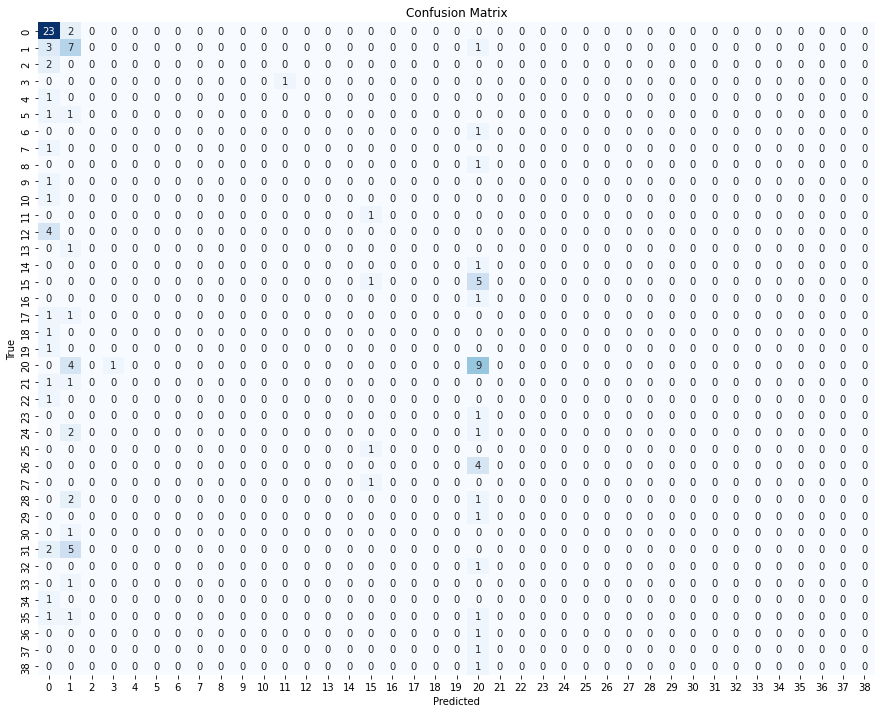

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(validation_test, final_predictions3)
# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [51]:
# Get the number of classes
num_classes = len(cm)

# Initialize a list to store misclassifications for each class
misclassifications_per_class = []

# Calculate misclassifications for each class
for i in range(num_classes):
    # Sum false positives (FP) and false negatives (FN) for class i
    misclassifications = cm[:, i].sum() - cm[i, i]
    misclassifications_per_class.append(misclassifications)

# Print misclassifications for each class with misclassifications
for i, misclassifications in enumerate(misclassifications_per_class):
    if misclassifications > 0:
        print(f"Class {i}: {misclassifications} misclassifications")

Class 0: 23 misclassifications
Class 1: 22 misclassifications
Class 3: 1 misclassifications
Class 11: 1 misclassifications
Class 15: 3 misclassifications
Class 20: 23 misclassifications


In [52]:
validation_test.unique()

array(['dance pop', 'glam rock', 'big beat', 'appalachian folk',
       'adult standards', 'mellow gold', 'album rock',
       'brill building pop', 'barbadian pop', 'british invasion',
       'bubblegum dance', 'hollywood', 'cowboy western', 'hip hop',
       'g funk', 'eurodance', 'native american', 'alternative country',
       'east coast hip hop', 'art rock', 'blues rock', 'dance rock',
       'classic country pop', 'beach music', 'neo mellow', 'disco',
       'europop', 'classic rock', 'bronx hip hop', 'alternative metal',
       'big room', 'modern rock', 'dirty south rap', 'canadian pop',
       'boy band', 'deep adult standards', 'diva house', 'jazz fusion',
       'glam metal'], dtype=object)

We identify that the classes of "dance pop", "glam rock" and "art rock" are often misclassified by our model. To tackle that feature engineering may be useful, as well as ploting the missclassified genres together to identify any potential causes of the problem. Finally, removing outliers may be beneficial as long as there are not many of them (The dataset is already small and Machine Learning models have higher performance the more data).